<a href="https://colab.research.google.com/github/ArmanS18/AER850_Project3/blob/main/AER850_Project3_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/AER850_Project3/Project_3_Data


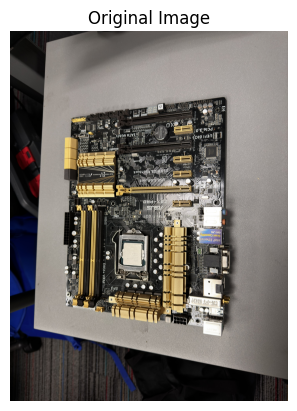

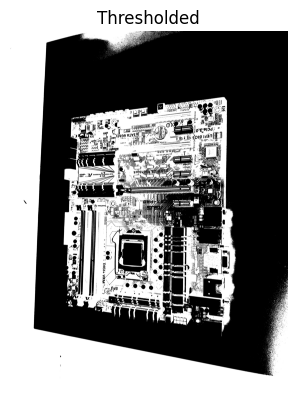

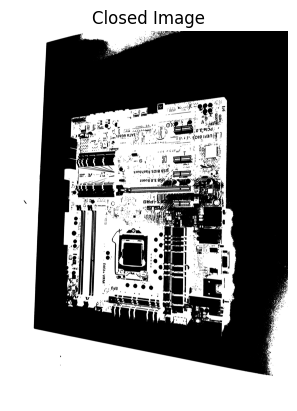

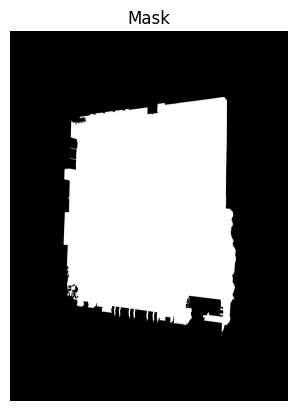

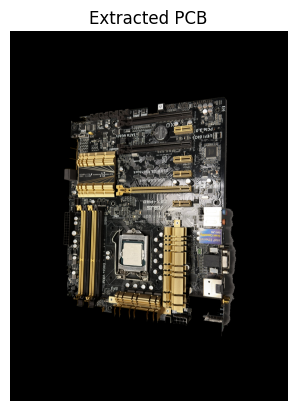

Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.zip, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=900, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=pcb_model, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c417c460aa0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.04504

In [26]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/AER850_Project3/Project_3_Data

#!pip install ultralytics opencv-python-headless matplotlib numpy pillow

import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

#Load Image
img = cv2.imread('motherboard_image.JPEG')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()

#Grayscale & Threshold
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 90, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh, cmap='gray')
plt.title("Thresholded")
plt.axis('off')
plt.show()

#Morphological closing
kernel = np.ones((5, 5), np.uint8)
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

plt.imshow(closed, cmap='gray')
plt.title("Closed Image")
plt.axis('off')
plt.show()

#Detect PCB
contours, hierarchy = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour = max(contours, key=cv2.contourArea)


#Mask
mask = np.zeros_like(gray)
cv2.drawContours(mask, [contour], -1, 255, thickness=cv2.FILLED)

plt.imshow(mask, cmap='gray')
plt.title("Mask")
plt.axis('off')
plt.show()

#Extract
extracted = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)
plt.imshow(extracted)
plt.title("Extracted PCB")
plt.axis('off')
plt.show()

#YOLO Training

model = YOLO('yolo11n.pt')

model.train(
    data="data.zip",
    epochs=150,
    batch=8,
    imgsz=900,
    name="pcb_model",
)

#Evaluation
model = YOLO("runs/detect/pcb_model/weights/best.pt")
eval_dir = "/content/drive/MyDrive/AER850_Project3/Project_3_Data/data/evaluation"
results = model.predict(eval_dir, imgsz=928)
for r in results:
    plt.imshow(r.plot())
    plt.axis('off')
    plt.show()
